In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from agents.q_learner import Q_learner
from agents.distrib_learner import Distrib_learner

%matplotlib inline

In [2]:
indices = torch.Tensor([[2],[1],[0]]).long()
print(indices.size())
mask = torch.zeros(3, 3)
src = torch.randn(3,3)
print(src)
print(mask)
mask.scatter_(1, indices , src)
print(mask)


torch.Size([3, 1])
tensor([[-0.1807, -0.1580,  0.5362],
        [ 1.3032,  2.0668,  0.5171],
        [ 1.6738,  0.1533, -1.9882]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[ 0.0000,  0.0000, -0.1807],
        [ 0.0000,  1.3032,  0.0000],
        [ 1.6738,  0.0000,  0.0000]])


In [3]:
args = dict()
args["BUFFER_SIZE"] = int(500)  # replay buffer size
args["BATCH_SIZE"] = 32  # minibatch size
args["GAMMA"] = 0.95  # discount factor
args["TAU"] = 1e-3  # for soft update of target parameters
args["LR"] = 0.001  # learning rate
args["UPDATE_EVERY"] = 4  # how often to update the network

In [4]:
env = gym.make('CartPole-v1')
env.seed(0)
agent = Distrib_learner(N=100, Vmin=-300, Vmax=300, state_size=env.observation_space.shape[0], action_size= env.action_space.n, seed=0, hiddens = [24,24], args = args)

In [9]:
state = env.reset()

Episode 100	Average Score: 17.54
Episode 200	Average Score: 13.15
Episode 300	Average Score: 11.44
Episode 400	Average Score: 10.43
Episode 500	Average Score: 9.840
Episode 600	Average Score: 9.80
Episode 700	Average Score: 9.72
Episode 800	Average Score: 9.42
Episode 900	Average Score: 9.82
Episode 1000	Average Score: 10.32
Episode 1100	Average Score: 11.46
Episode 1200	Average Score: 12.38
Episode 1300	Average Score: 36.87
Episode 1400	Average Score: 54.30
Episode 1500	Average Score: 107.76
Episode 1600	Average Score: 118.52
Episode 1700	Average Score: 137.19
Episode 1800	Average Score: 122.84
Episode 1900	Average Score: 129.25
Episode 2000	Average Score: 115.94
Episode 2100	Average Score: 120.12
Episode 2200	Average Score: 166.55
Episode 2300	Average Score: 177.93
Episode 2400	Average Score: 129.04
Episode 2500	Average Score: 186.41
Episode 2600	Average Score: 176.79
Episode 2632	Average Score: 200.15
Environment solved in 2532 episodes!	Average Score: 200.15


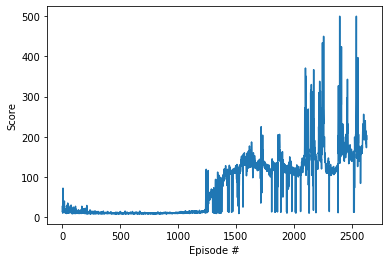

In [6]:
def dqn(n_episodes=10000, max_t=1000, eps_start=1, eps_end=0.01, eps_decay=0.995):

    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state.reshape([1, -1]), eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'models/checkpoints/checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
